# Credit Card Fraud Detection
### Goal: Build a ML model to identify fraudulent credit card transactions.

In [1]:
# imports
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load data

In [2]:
df = pd.read_csv('./creditcard.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### Data Preprocessing

In [5]:
# check for empty or missing values
df.isna().sum().sum()

0

In [6]:
# Normalize 'Time' and 'Amount' using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[['Time', 'Amount']] = scaler.fit_transform(df[['Time', 'Amount']])

In [7]:
# Separate features and target
X = df_scaled.drop('Class', axis=1)
y = df_scaled['Class']

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Overview of the split
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227845, 30), (56962, 30), (227845,), (56962,))

In [10]:
# Adjust class weight b/c imbalance in the dataset
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

#### Model Building

In [11]:
rf = RandomForestClassifier(n_estimators=100, class_weight=class_weights_dict, random_state=42)

In [12]:
# Train the model
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.5008661206149896,
                                     1: 289.14340101522845},
                       random_state=42)

In [13]:
# Predict using test set
y_pred = rf.predict(X_test)

In [15]:
# Evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

accuracy

0.9995611109160493

In [16]:
conf_matrix

array([[56863,     1],
       [   24,    74]], dtype=int64)

In [17]:
print(class_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.99      0.76      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962



After training, test, and evaluating the RandomForestClassifier model, we can see that we have achieved 99% accuracy, 88% recall, and 99% precision as well as 93% f1-score. Since our data is highly imbalanced, it is important that we use a 'balanced' approach and evaluate the performance on the basis of f1-score to consider the false positives and false negatives. 

#### Let's see if we can optimize the model further using GridSearch to find the most optimal params. 

In [18]:
from sklearn.model_selection import GridSearchCV

# Define a small grid of parameters
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 4]
}

# Initialize the GridSearchCV object with RandomForestClassifier and the parameter grid
grid_search = GridSearchCV(RandomForestClassifier(class_weight='balanced'), param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Best parameters found by GridSearchCV
grid_search.best_params_


Fitting 3 folds for each of 18 candidates, totalling 54 fits


{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}

From this we can see that the best split might be 2 and n_estimators might be 50. 

In [19]:
rf_optimal = RandomForestClassifier(n_estimators=50, min_samples_split= 2, class_weight=class_weights_dict, random_state=42)

In [20]:
rf_optimal.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.5008661206149896,
                                     1: 289.14340101522845},
                       n_estimators=50, random_state=42)

In [21]:
# Predict using test set
y_pred_optimal = rf_optimal.predict(X_test)

In [22]:
# Evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

accuracy = accuracy_score(y_test, y_pred_optimal)
conf_matrix = confusion_matrix(y_test, y_pred_optimal)
class_report = classification_report(y_test, y_pred_optimal)

accuracy

0.9995786664794073

In [23]:
conf_matrix

array([[56863,     1],
       [   23,    75]], dtype=int64)

In [24]:
print(class_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.99      0.77      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962



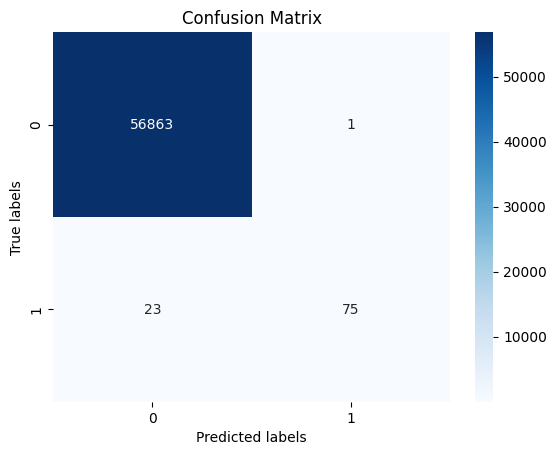

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test are the true labels and y_pred are the predicted labels from your model
cm = confusion_matrix(y_test, y_pred_optimal)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

True Negatives (TN): 56,863 – RF correctly predicted the non-fraudulent transactions.
False Positives (FP): 1 – RF incorrectly predicted these transactions as fraudulent.
False Negatives (FN): 23 – RF incorrectly predicted these fraudulent transactions as non-fraudulent.
True Positives (TP): 75 – RF correctly predicted these transactions as fraudulent.

From these we focus on the FP and FN, although the FP are very low, FN is 23, which isn't bad, but considering that our data is skewed in terms of class imbalance this could pose a problem.

In [27]:
y_scores = rf_optimal.predict_proba(X_test)[:, 1]  # Get the probabilities of the positive class

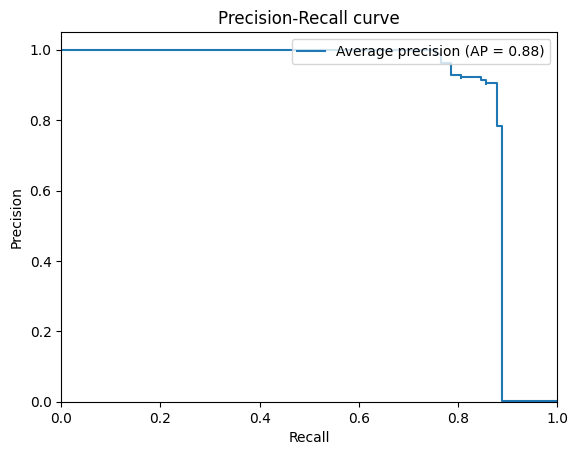

In [28]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_scores)

# Compute average precision
average_precision = average_precision_score(y_test, y_scores)

plt.figure()
plt.step(recall, precision, where='post', label='Average precision (AP = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve')
plt.legend(loc="upper right")
plt.show()

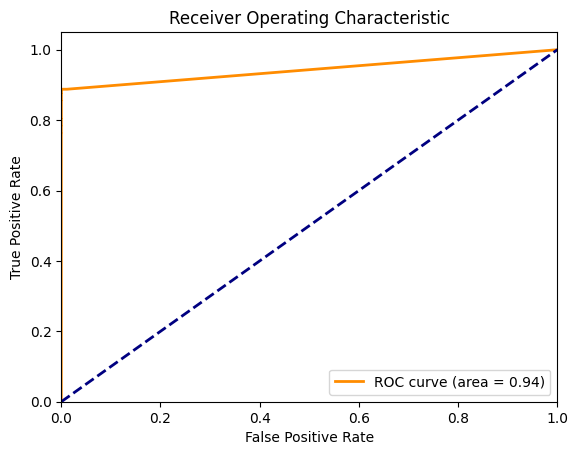

In [29]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_scores) # y_scores are the probabilities of the positive class
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In the ROC curve plot, the AUC is 0.94 which is rather good. 

To conclude, we can see that even after cross validation, there isn't any improvement in the RF Classifier model. However, considering that it is highly accurate with a good F1-score, we can conclude that it is suited for detecting fraudulant credit card transactions. 